# Outlier Treatment

## What is an outlier?

Outlier is an observation that appears far away and diverges from an overall pattern in a dataset. For example, the average annual income of customers is \$0.5 million. But there is a customer having annual income of \$20 million. This oberservation would be considered as an outliler.


## What is the impact of outliers on a dataset?

Outliers can drastically change the results of the data analysis and statistical modeling: 1) They can increase the error variance and reduce the power of statistical modeling, and 2) They can bias or influence estimates.

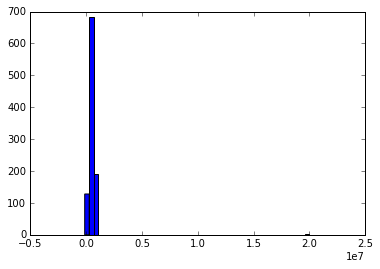

In [48]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(500000, 200000, 1000)

# An outlier who has annual income of $4 million
incomes = np.append(incomes, [20000000])

plt.hist(incomes, 50)
plt.show()


In [49]:
print "Mean = " + str(np.mean(incomes)) + "\n" + "Median = " + str(np.median(incomes)) + "\n" + "Standard Deviation = " + str(np.std(incomes))

Mean = 520142.292384
Median = 500777.166198
Standard Deviation = 647230.390697


## How to detect Outliers?

Most commonly used method to detect outliers is visualization like Box-plot, Histogram and Scatter Plot. There are also thumb rules: 1) Any value, which is beyond the range of $Q1 - 1.5 \times IQR$ to $Q3 + 1.5 \times IQR$ (IQR: Interquartile Range), 2) Any value, which is out of range of 5th and 95th percentile, 3) Data points, which are three or more standard deviation away from mean, and 4) Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.

### IQR Rule for Outliers

1. Arrange data in order.
2. Calculate first quartile (Q1), third quartile (Q3) and the interquartile range (IQR = Q3 - Q1).
3. Compute Q1 – 1.5 × IQR, and compute Q3 + 1.5 × IQR. Anything outside this range is an outlier.


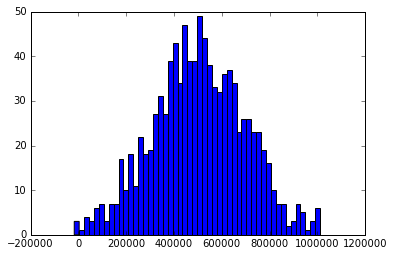

In [50]:
def del_outliers_IQR(data):
    data.sort()
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    
    filtered = [x for x in data if (q1 - 1.5 * iqr < x < q3 + 1.5 * iqr)]
    return filtered

filtered = del_outliers_IQR(incomes)

plt.hist(filtered, 50)
plt.show()

In [51]:
print "Mean = " + str(np.mean(filtered)) + "\n" + "Median = " + str(np.median(filtered)) + "\n" + "Standard Deviation = " + str(np.std(filtered))

Mean = 503043.834624
Median = 501698.772918
Standard Deviation = 192624.302905


### Using Standard Deviation

Anything, which is three or more standard deviation away from mean, is an outlier.

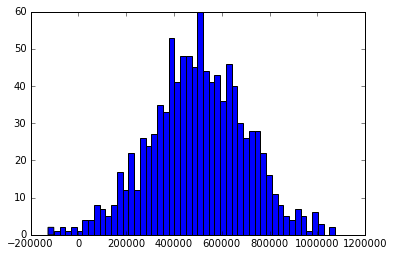

In [52]:
def del_outliers_std(data):
    mu = np.mean(data)
    std = np.std(data)
    
    filtered = [x for x in data if (mu - 3 * std < x < mu + 3 * std)]
    return filtered

filtered = del_outliers_std(incomes)

plt.hist(filtered, 50)
plt.show()

In [53]:
print "Mean = " + str(np.mean(filtered)) + "\n" + "Median = " + str(np.median(filtered)) + "\n" + "Standard Deviation = " + str(np.std(filtered))

Mean = 500662.434677
Median = 500520.582956
Standard Deviation = 198700.187859
